## EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('flight.csv')
df.sample(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
30268,38927,11/27/2007,4/22/2009,Male,4,shanghai,shanghai,CN,41.0,3/31/2014,...,884.0,9104,3/14/2014,18,100.428571,265,0,0.811358,6067,0
29306,1203,7/10/2007,7/12/2007,Male,4,qingdao,shandong,CN,36.0,3/31/2014,...,0.0,9396,7/14/2012,627,9.666667,23,0,0.823499,6636,0
4094,56309,6/10/2005,10/7/2005,Male,4,beijing,beijing,CN,64.0,3/31/2014,...,13062.0,26155,3/19/2014,13,42.312500,267,0,1.450384,36842,1
28641,18674,12/23/2005,12/24/2005,Male,4,beijing,beijing,CN,47.0,3/31/2014,...,2340.0,11887,12/14/2013,109,50.583333,169,1,0.670405,7236,7
44134,4402,3/11/2010,1/6/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,0.0,5351,7/14/2012,627,49.500000,97,0,0.706410,3796,0
26999,27454,7/10/2012,7/8/2013,Male,4,guangzhou,guangdong,CN,28.0,3/31/2014,...,7906.0,11226,2/28/2014,33,39.166667,93,0,0.770464,9324,12
28968,47462,12/2/2005,12/22/2005,Male,4,beijing,beijing,CN,48.0,3/31/2014,...,3520.0,13189,1/15/2014,77,53.111111,127,0,0.595439,5635,0
51045,60574,6/10/2012,6/10/2012,Male,4,luoyang,henan,CN,42.0,3/31/2014,...,0.0,4031,7/5/2012,636,25.000000,25,0,0.643984,1509,0
50150,28914,1/3/2013,1/28/2013,Female,4,beijing,beijing,CN,22.0,3/31/2014,...,855.0,6953,1/20/2014,72,178.500000,323,0,0.392829,1687,0
55041,45335,11/7/2011,10/15/2013,Female,4,guangzhou,guangdong,CN,33.0,3/31/2014,...,1901.0,4482,1/11/2014,81,44.000000,87,0,0.446162,1204,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Kolom FFP_Tier seharusnya string

In [4]:
df['FFP_TIER'] = df['FFP_TIER'].astype(object)

Drop Kolom Yang terlalu banyak unique value

In [5]:
df.drop(columns=['MEMBER_NO','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE'], inplace=True)

In [6]:
#membagi data dalam numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [7]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0
MAX_INTERVAL,62988.0,166.033895,123.397180,0.0,79.000000,143.000000,228.000000,728.0
EXCHANGE_COUNT,62988.0,0.319775,1.136004,0.0,0.000000,0.000000,0.000000,46.0


In [8]:
df[kat].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
FFP_TIER,62988,3,4,58066


In [9]:
# menampilkan jumlah null
df.isna().sum()

GENDER               3
FFP_TIER             0
AGE                420
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1           551
SUM_YR_2           138
SEG_KM_SUM           0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [10]:
# persentase missing value 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': round(percent_missing,2)})
missing_value_df

,column_name,percent_missing
GENDER,GENDER,0.00
FFP_TIER,FFP_TIER,0.00
AGE,AGE,0.67
FLIGHT_COUNT,FLIGHT_COUNT,0.00
BP_SUM,BP_SUM,0.00
SUM_YR_1,SUM_YR_1,0.87
SUM_YR_2,SUM_YR_2,0.22
SEG_KM_SUM,SEG_KM_SUM,0.00
LAST_TO_END,LAST_TO_END,0.00
AVG_INTERVAL,AVG_INTERVAL,0.00


Handling missing value dilakukan dengan Imputation

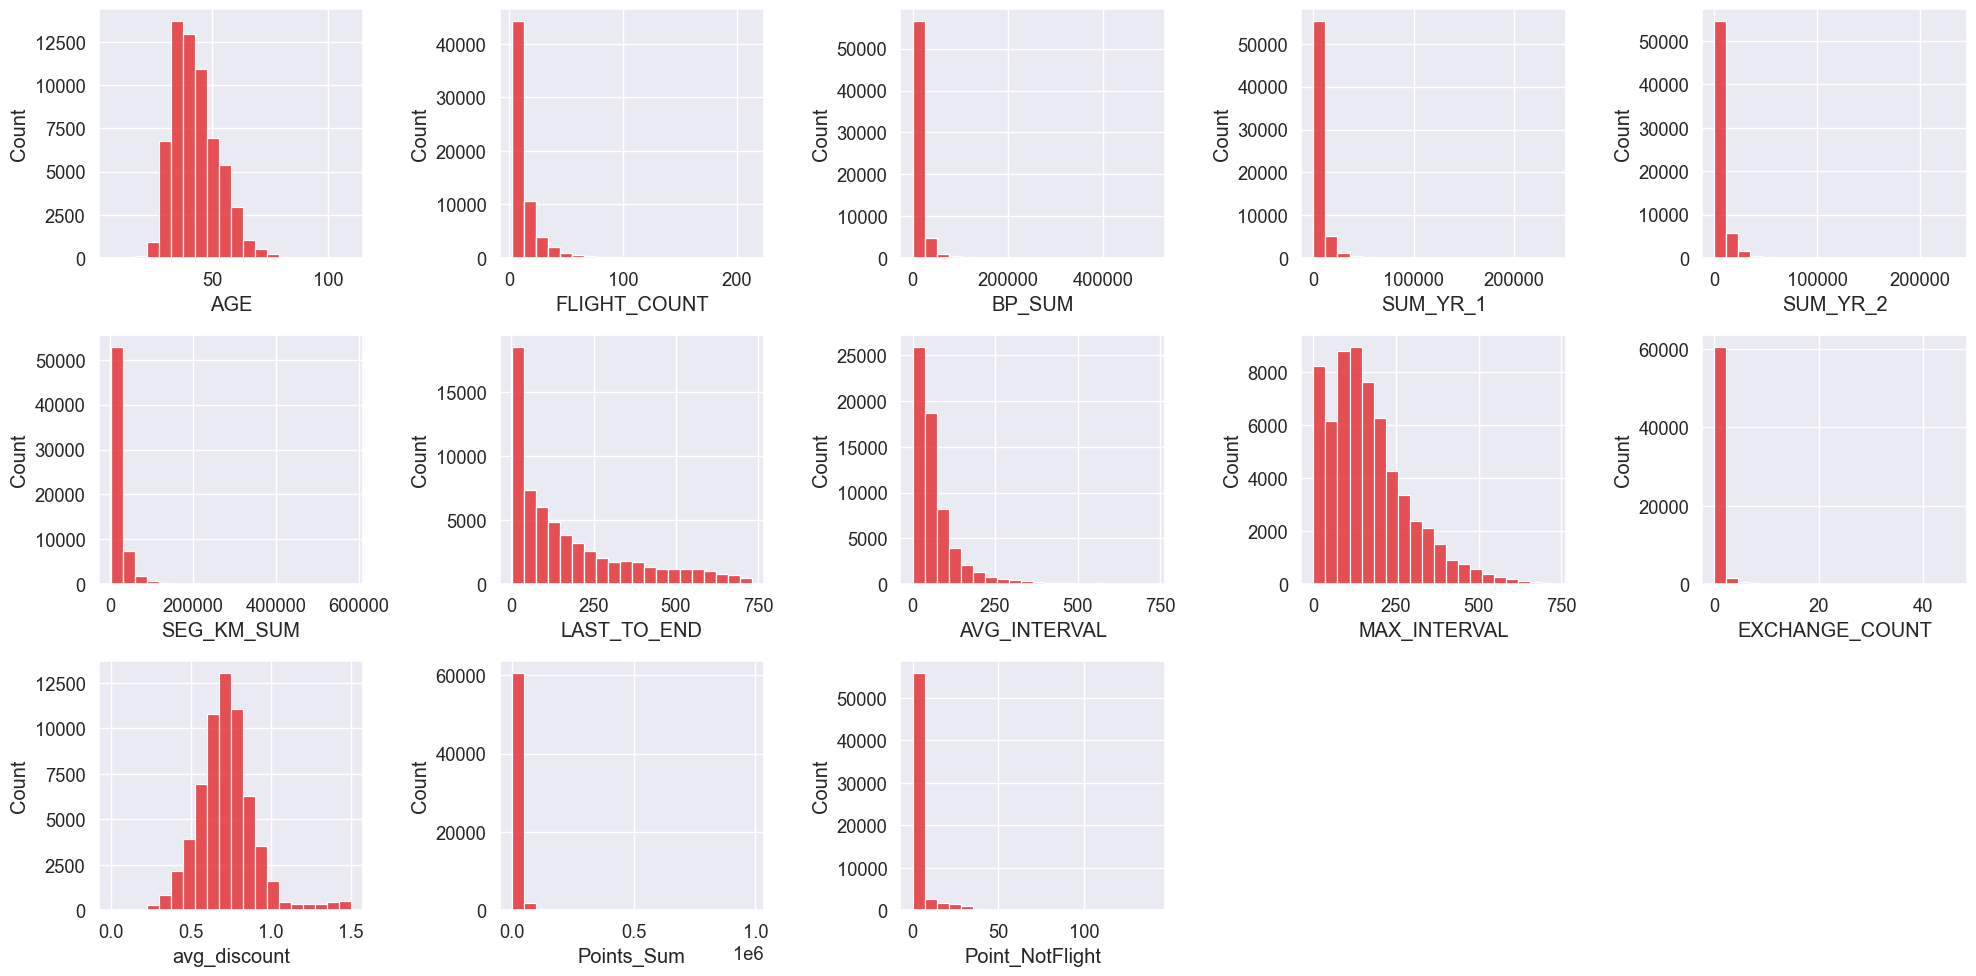

In [11]:
plt.figure(figsize=(20,10))

for i,j in enumerate(num):
        plt.subplot(3,5,i+1)
        sns.histplot(x=df[j], bins=20)
        plt.tight_layout()

Karena sebagian besar kolom tidak berdistribusi normal, maka dilakukan imputasi dengan median

In [12]:
#data numerik
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

In [13]:
# data kategorikal 
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])

In [14]:
## cek missing value kembali
df.isna().sum()

GENDER             0
FFP_TIER           0
AGE                0
FLIGHT_COUNT       0
BP_SUM             0
SUM_YR_1           0
SUM_YR_2           0
SEG_KM_SUM         0
LAST_TO_END        0
AVG_INTERVAL       0
MAX_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

In [15]:
# menampilkan apakah dataset terdapat duplikasi data atau tidak
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,62987.0,42.466541,9.853706,6.0,35.000000,41.000000,48.00000,110.0
FLIGHT_COUNT,62987.0,11.839570,14.049528,2.0,3.000000,7.000000,15.00000,213.0
BP_SUM,62987.0,10925.225475,16339.575767,0.0,2518.000000,5700.000000,12831.00000,505308.0
SUM_YR_1,62987.0,5333.068955,8077.463629,0.0,1020.000000,2800.000000,6524.50000,239560.0
SUM_YR_2,62987.0,5597.912410,8694.872829,0.0,785.000000,2773.000000,6826.50000,234188.0
SEG_KM_SUM,62987.0,17124.073650,20960.953906,368.0,4747.000000,9994.000000,21271.50000,580717.0
LAST_TO_END,62987.0,176.113500,183.816213,1.0,29.000000,108.000000,267.50000,731.0
AVG_INTERVAL,62987.0,67.750752,77.518103,0.0,23.370370,44.666667,82.00000,728.0
MAX_INTERVAL,62987.0,166.036420,123.396532,0.0,79.000000,143.000000,228.00000,728.0
EXCHANGE_COUNT,62987.0,0.319780,1.136013,0.0,0.000000,0.000000,0.00000,46.0


In [18]:
df[kat].describe().T

,count,unique,top,freq
GENDER,62987,2,Male,48136
FFP_TIER,62987,3,4,58065


In [19]:
#menampilkan proporsi jumlah value pada masing2 kolom kategorik (sudah scaling 100%)
for i in kat:
        print(round(df[i].value_counts(normalize=True).multiply(100),0),'\n')

Male      76.0
Female    24.0
Name: GENDER, dtype: float64 

4    92.0
5     5.0
6     2.0
Name: FFP_TIER, dtype: float64 



### __OUTLIERS__

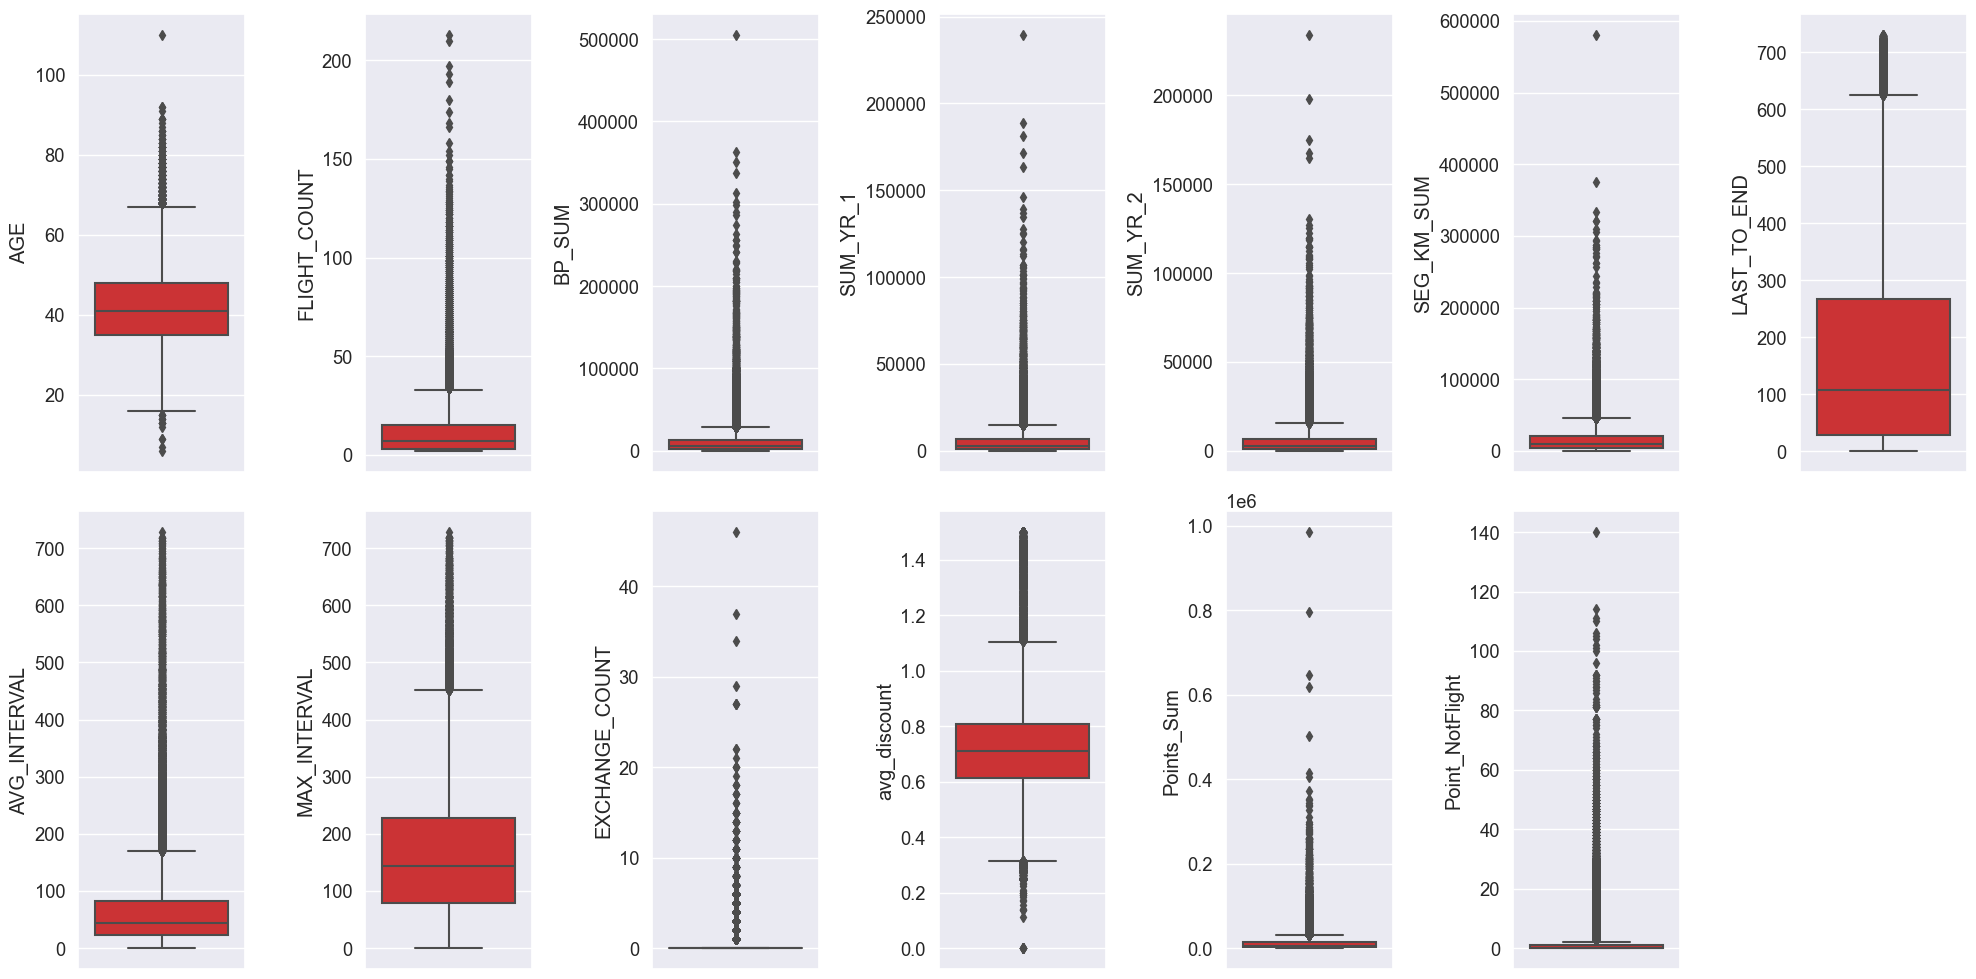

In [20]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(3,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

karena semua outliers termasuk natural outliers, maka dibiarkan saja

### __ENCODING__

In [21]:
df['FFP_TIER'] = df['FFP_TIER'].astype(int)

df['GENDER'] = df['GENDER'].map({
        "Male":0,
        "Female":1
})

<AxesSubplot: >

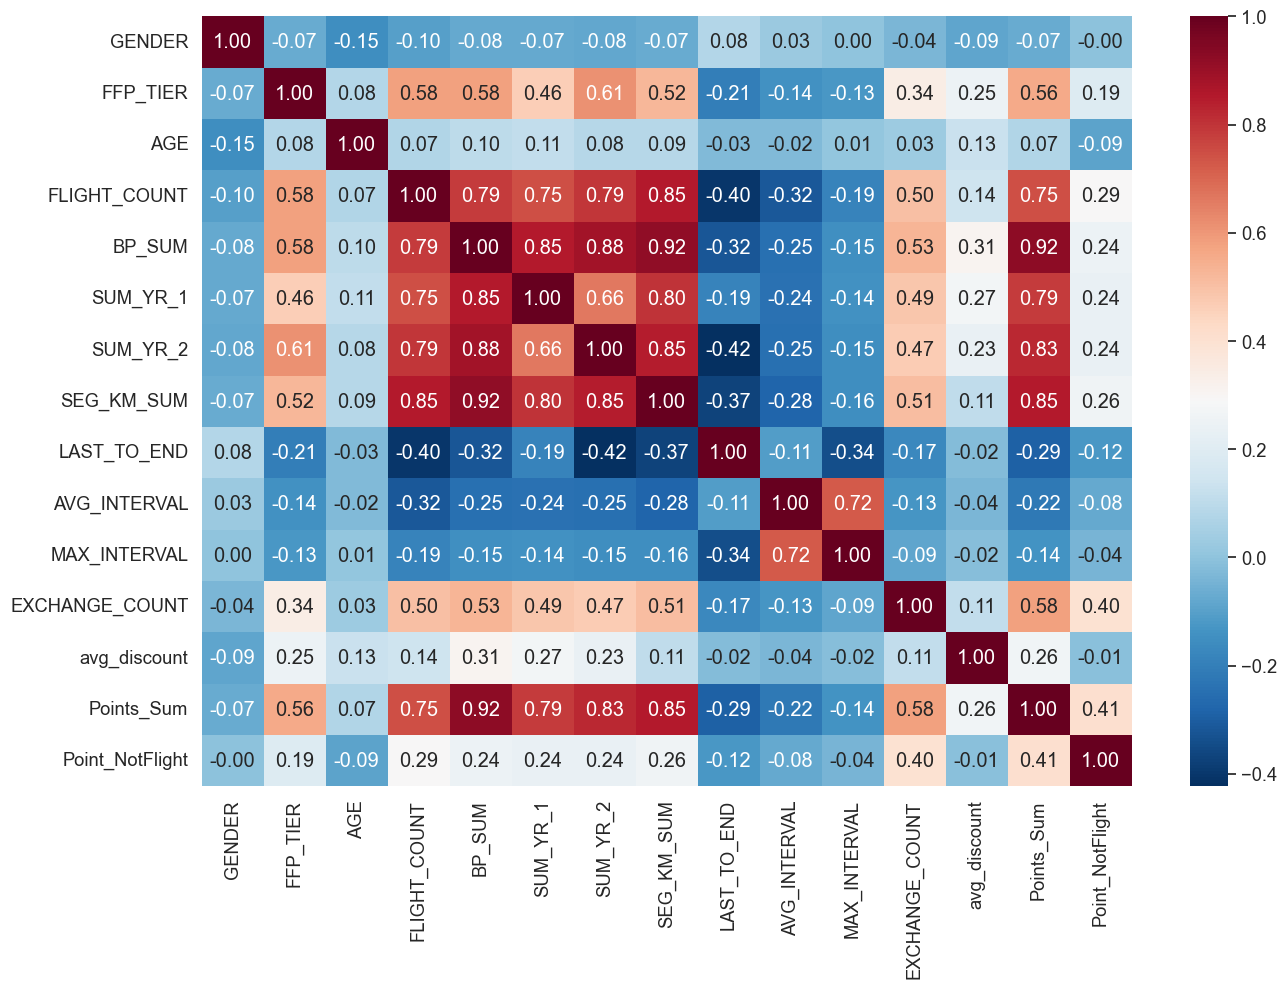

In [22]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu_r' )

'BP_SUM'
'SEG_KM_SUM'
'FLIGHT_COUNT'
'SUM_YR_2'
'Points_Sum'
'SUM_YR_1'

adalah fitur yang memiliki korelasi paling tinggi, selain itu semua fitur diatas sangat masuk akal untuk menggolongkan customer menjadi beberapa golongan berdasarkan perilaku mereka yang suka bepergian/tidak

In [23]:
feat = ['BP_SUM', 'SEG_KM_SUM', 'FLIGHT_COUNT', 'SUM_YR_2', 'Points_Sum', 'SUM_YR_1']
df = df[feat]

### __STANDARISASI__

In [24]:
from sklearn.preprocessing import StandardScaler

scaler={}
for i in feat:
        scaler[i] = StandardScaler()
        scaler[i].fit(df[[i]])

        df[i] = scaler[i].transform(df[[i]])


### __CLUSTERING__

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia=[]
for i in range(1,10):
        kmean = KMeans(n_clusters=i, max_iter=300, random_state=7)
        kmean.fit(df.values)

        inertia.append(kmean.inertia_)

<AxesSubplot: >

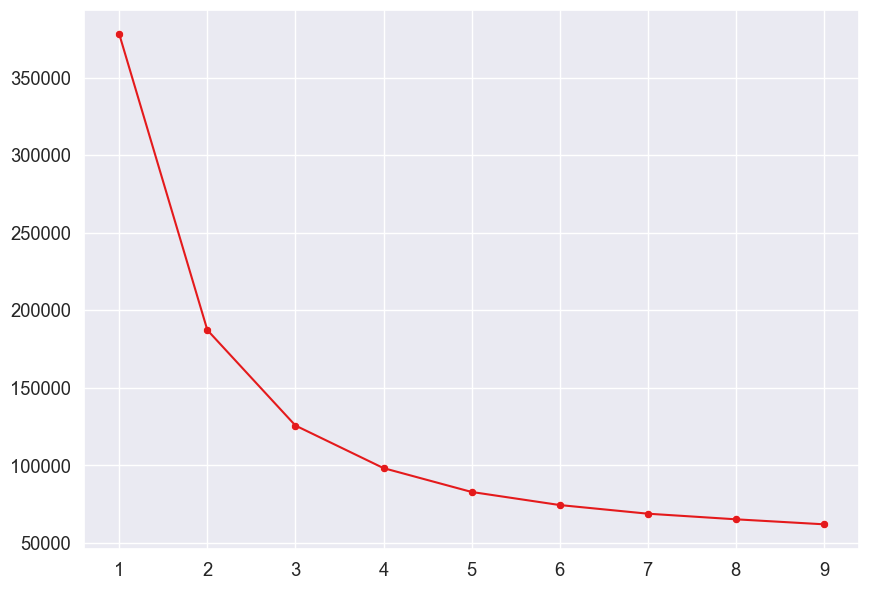

In [26]:
sns.lineplot(y=inertia, x=range(1,10))
sns.scatterplot(x=range(1,10), y=inertia)

In [27]:
pd.Series(inertia) - pd.Series(inertia).shift(-1) 

0    190685.600165
1     61520.773907
2     27451.137818
3     15368.876102
4      8433.392720
5      5573.680213
6      3618.269770
7      3229.419607
8              NaN
dtype: float64

Dari sini ditemukan cluster optimal adalah sebanyak 4

In [28]:
kmean = KMeans(n_clusters=4, max_iter=300, random_state=7)
kmean.fit(df.values)

KMeans(n_clusters=4, random_state=7)

In [29]:
df['Cluster'] = kmean.labels_

In [30]:
df_inverse = df.copy()
for i in feat:
        df_inverse[i] = scaler[i].inverse_transform(df_inverse[[i]])

In [31]:
df_inverse.groupby('Cluster').agg(['mean','min','max'])


BP_SUM                       SEG_KM_SUM                    \
                  mean     min       max           mean     min       max   
Cluster                                                                     
0          4367.337796     0.0   19773.0    7826.664918   368.0   37456.0   
1         45117.933125  6250.0  119401.0   64540.428051  8648.0  201613.0   
2        118621.691756   634.0  505308.0  132713.741935  2695.0  580717.0   
3         18140.706669     0.0   54407.0   29124.492316  2654.0  104188.0   

        FLIGHT_COUNT                  SUM_YR_2                    Points_Sum  \
                mean  min    max          mean  min       max           mean   
Cluster                                                                        
0           5.602422  2.0   26.0   2205.712300  0.0   20762.0    5045.154008   
1          44.953422  4.0  128.0  23707.706479  0.0   73352.0   51873.383555   
2          73.727599  3.0  213.0  55736.478495  0.0  234188.0  149374.336918   
3          20.156029  2.0   66.0   9436.230291  0.0   47632.0   20194.598742   

                                     SUM_YR_1                 
                  min       max          mean  min       max  
Cluster                                                       
0        1.818989e-12   79244.0   2346.014044  0.0   22102.0  
1        1.296500e+04  235494.0  21028.779079  0.0  125188.0  
2        5.248100e+04  985572.0  51385.025090  0.0  239560.0  
3        4.130000e+02  170759.0   8706.102209  0.0   59310.0

### __PCA__

In [32]:
from sklearn.decomposition import PCA

df_pca = df.copy()
x = df_pca.drop('Cluster', axis=1)
y = df_pca['Cluster']

pcs = PCA(n_components=6).fit(x)
pdf = pd.DataFrame(data=pcs.transform(x), columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pdf['Cluster'] = y

pdf

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,63.931714,5.000196,10.911687,-3.427131,0.259053,1.730514,2.0
1,41.973024,4.046136,8.380845,-2.146609,4.782236,-0.736170,2.0
2,40.654237,3.502447,8.328069,-1.998930,4.708098,-0.659189,2.0
3,32.324414,2.912639,13.485743,-2.736183,-0.214585,-1.557969,2.0
4,34.808782,1.513738,4.074586,-0.688161,0.676330,0.342483,2.0
...,...,...,...,...,...,...,...
62982,-1.405105,0.008179,0.386845,0.482198,0.040481,0.109059,0.0
62983,0.689794,0.111998,2.469453,3.851501,-0.244677,1.231963,0.0
62984,-1.622925,-0.015516,0.090096,0.020047,-0.010284,-0.006722,3.0
62985,-1.595897,-0.019551,0.083831,0.002703,-0.061550,0.012562,0.0


<BarContainer object of 6 artists>

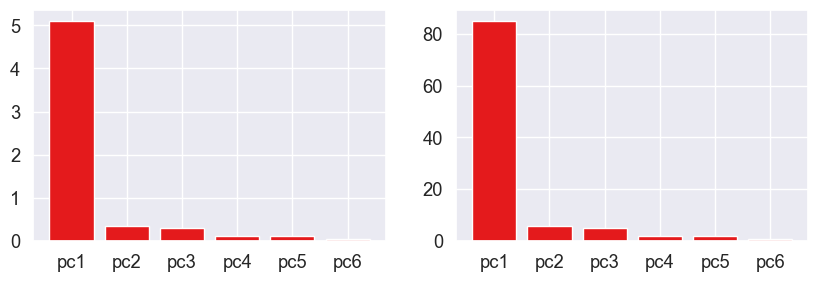

In [33]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(['pc1','pc2','pc3','pc4','pc5','pc6'], pcs.explained_variance_)
plt.subplot(1,2,2)
plt.bar(['pc1','pc2','pc3','pc4','pc5','pc6'], pcs.explained_variance_ratio_*100)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

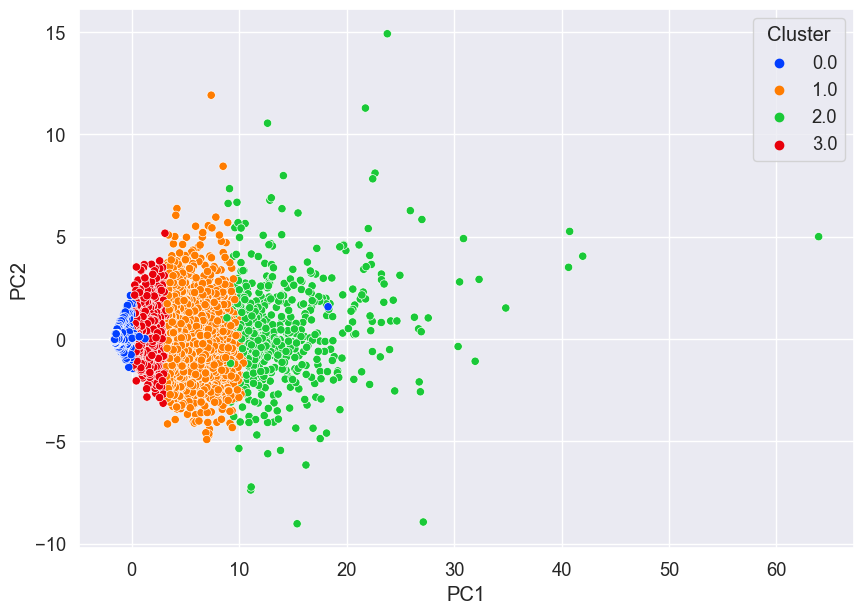

In [34]:
sns.scatterplot(x=pdf['PC1'], y=pdf['PC2'], hue=pdf['Cluster'], palette='bright')

In [35]:
df_inverse.groupby('Cluster').agg(['mean','min','max'])

BP_SUM                       SEG_KM_SUM                    \
                  mean     min       max           mean     min       max   
Cluster                                                                     
0          4367.337796     0.0   19773.0    7826.664918   368.0   37456.0   
1         45117.933125  6250.0  119401.0   64540.428051  8648.0  201613.0   
2        118621.691756   634.0  505308.0  132713.741935  2695.0  580717.0   
3         18140.706669     0.0   54407.0   29124.492316  2654.0  104188.0   

        FLIGHT_COUNT                  SUM_YR_2                    Points_Sum  \
                mean  min    max          mean  min       max           mean   
Cluster                                                                        
0           5.602422  2.0   26.0   2205.712300  0.0   20762.0    5045.154008   
1          44.953422  4.0  128.0  23707.706479  0.0   73352.0   51873.383555   
2          73.727599  3.0  213.0  55736.478495  0.0  234188.0  149374.336918   
3          20.156029  2.0   66.0   9436.230291  0.0   47632.0   20194.598742   

                                     SUM_YR_1                 
                  min       max          mean  min       max  
Cluster                                                       
0        1.818989e-12   79244.0   2346.014044  0.0   22102.0  
1        1.296500e+04  235494.0  21028.779079  0.0  125188.0  
2        5.248100e+04  985572.0  51385.025090  0.0  239560.0  
3        4.130000e+02  170759.0   8706.102209  0.0   59310.0